In [46]:
#%install_ext https://raw.github.com/cpcloud/ipython-autotime/pull/5
#%load_ext autotime

# Ch. 4: Training Models

***
***

What did we do last few chapters? 
 - Optimized a regression system
 - Improved image classification
 
Time to look under the hood for more efficient debugging.

What will we look at upcoming?
 - Linear Regression models
  - Training Method 1: "closed-form" equation computing best fit model parameters to minimize cost function over training set
  - Training Method 2: "Gradient Descent", tweaking parameters to converge on model parameters that minimize cost function.
 - Polynomial Regression models
  - Detect overfitting
  - Regularization techniques to avoid overfitting
  - Regression for classification
   - Logistic regression
   - Softmax regression
***

## 4.1 - Linear Regression

### 4.1.1 - Mathematical Definition of Linear Regression Model

Linear model predicts via a weighted sum of input features plus a bias term:

$$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

- $\hat{y}$: predicted value
- $n$: number of features (or dimensions)
- $x_{i}$: ith feature
- $\theta_{j}$: jth model parameter including bias term as $\theta_{0}$

In vectorized notation:

$$\boxed{\hat{y} = h_{\boldsymbol{\theta}} \textbf{(x)} = \boldsymbol{\theta} \cdot \textbf{x}}$$
- $\boldsymbol{\theta}$: **Parameter Vector** containing bias term $\theta_{0}$ and feature weights $\theta_1$ to $\theta_n$
- $\textbf{x}$: **Feature Vector** containing $x_0$ to $x_n$ where $x_0 = 1$
- $\boldsymbol{\theta} \cdot \textbf{x}$: **Dot Product** of _parameter_ and _feature_ vectors (element-wise multiplaction then summing)
- $h_0$: **Hypothesis Function** using model parameters $\boldsymbol{\theta}$

Vectors are often represented as **column vectors**. If we are indeed only dealing with column vectors of a single column for a single instance (and we include our bias term), we can say our prediction in matrix multiplication form becomes:

$$\boxed{\hat{y} = \boldsymbol{\theta}^{T}\textbf{x}}$$

### 4.1.2 - Training Linear Regression: Cost Function

Ch. 2, we saw common use is the _Root Mean Square Error_ (RMSE). We want to find a value of $\boldsymbol{\theta}$ that minimizes the RMSE. Can also use the _Mean Square Error_ (MSE) as if the square root of a function is minimized, so is the function.

**MSE of Linear Regression of hypothesis** $h_{\theta}$ **on a training set** $\textbf{X}$:

$$\boxed{MSE(\textbf{X}, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\boldsymbol{\theta}^{T}\textbf{x}^{(i)} - y^{(i)})^2}$$

### 4.1.3 - Training Linear Regression: Closed Form Solution of Minimization of Cost Function

There is an equation that directly gives the best value for $\boldsymbol{\theta}$ called the **normal equation**:

$$\boxed{\boldsymbol{\hat{\theta}} = (\textbf{X}^{T}\textbf{X})^{-1} \textbf{X}^T \textbf{y}}$$

- $\hat{\boldsymbol{\theta}}$: parameter vector that minimizes cost function
- $\textbf{y}$: vector of target values

#### 4.1.3.1 - Testing and Plotting Closed Form Solution

Below, we can generate a random dataset with a linear dependence and compute our parameter vector that minimizes the cost function. Numpy has a linear algebra module that can compute the inverse and dot product of two matricies:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import *

X = 2 * np.random.rand(100,1)

def get_rand_lin_dist(alpha, beta):
    return alpha + beta * X + np.random.randn(100, 1)

def get_theta_best(X, Y):
    X_tot = np.c_[np.ones((100,1)), X]     # Add x0 = 1 to every instance
    return np.linalg.inv(X_tot.T.dot(X_tot)).dot(X_tot.T).dot(Y)

def plt_rand_lin_dist(alpha, beta):
    Y = get_rand_lin_dist(alpha, beta)
    
    X_lims = np.linspace(0, 2, num=100)
    X_lims_with_xo = np.c_[np.ones((100,1)), X_lims]
    
    theta_closed_form_pred = get_theta_best(X, Y)
    
    y_pred = X_lims_with_xo.dot(theta_closed_form_pred)
    
    plt.scatter(X, Y)
    plt.plot(X_lims, y_pred, 'r-')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Random Linear Distribution \n with Closed Form Fit')
    plt.xlim(0, 2)
    plt.ylim(0,20)
    plt.show()
    
    print("Closed Form Best Theta Predictions: ", theta_closed_form_pred)
    
interactive_plt_rand_lin_dist = interactive(plt_rand_lin_dist, 
                                            alpha=(0,20), beta=(0,10))
interactive_plt_rand_lin_dist

interactive(children=(IntSlider(value=10, description='alpha', max=20), IntSlider(value=5, description='beta',…

Interestingly enough, the closed form solution to $\hat{\boldsymbol{\theta}}$ has been thrown off by the random noise.

#### 4.1.3.2 Linear Regression via Scikit-Learn



In [3]:
from sklearn.linear_model import LinearRegression

y = get_rand_lin_dist(4, 3)

lin_reg=LinearRegression()
lin_reg.fit(X, y)
print("Intercept and Coefficient: ", lin_reg.intercept_, lin_reg.coef_)

Intercept and Coefficient:  [4.30701865] [[2.83187513]]


This did well! Now, we want it to predict new values, those at 0 and those at 2. 

In [4]:
X_new = np.array([[0], [2]])

print("Models Prediction for X @ 0 and 2: ", lin_reg.predict(X_new))

Models Prediction for X @ 0 and 2:  [[4.30701865]
 [9.9707689 ]]


If we adjust the sliders in our linear regression plot, we can see this is pretty close to what we expect.

The _LinearRegression_ class uses _scipy.linalg.lstsq()_, which can be called directly to provide a similar result.

#### 4.1.3.3 Calculating Pseudoinverse and Complexity of Lin. Reg.

We can calculate what is known as the _pseudoinverse_ directly (called the Moore-Penrose inverse):

$$\boldsymbol{\hat{\theta}} = \textbf{X}^{+}\textbf{y}$$

In [5]:
X_with_xo = np.c_[np.ones((100,1)), X]

print("Shape of X_with_xo:", X_with_xo.shape)
print("Shape of y: ", y.shape)
print("Pseudoinverse: ", np.linalg.pinv(X_with_xo).dot(y))

Shape of X_with_xo: (100, 2)
Shape of y:  (100, 1)
Pseudoinverse:  [[4.30701865]
 [2.83187513]]


The shapes make it clear why we are seeing a 2-dimensional feature vector.

Calculating a pseudoinverse is more efficient than computing the normal equation. Made clear by looking at their **complexities**:
- Normal equation = $O(n^{2.4}) \hspace{0.25cm} to \hspace{0.25cm} O(n^{3})$
- SVD = $O(n^2)$

**WARNING**: Finding the optimal feature vector $\boldsymbol{\hat{\theta}}$ gets slow with large number of features ($n > 100,000$). Scales linearly with number of instances though - $O(m)$ 

Once trained, you get very fast predictions (linear complexity w/ number of desired predictions). 

### 4.1.4 - Training Linear Regression: Gradient Descent

**Gradient Descent**: Uses local gradient of error function to find local minimum of parameter vector $\boldsymbol{\hat{\theta}}$ by stepping in direction of decreasing slope until the gradient is zero.

Start with random $\boldsymbol{\hat{\theta}}$ values and taking steps that decrease the cost function:

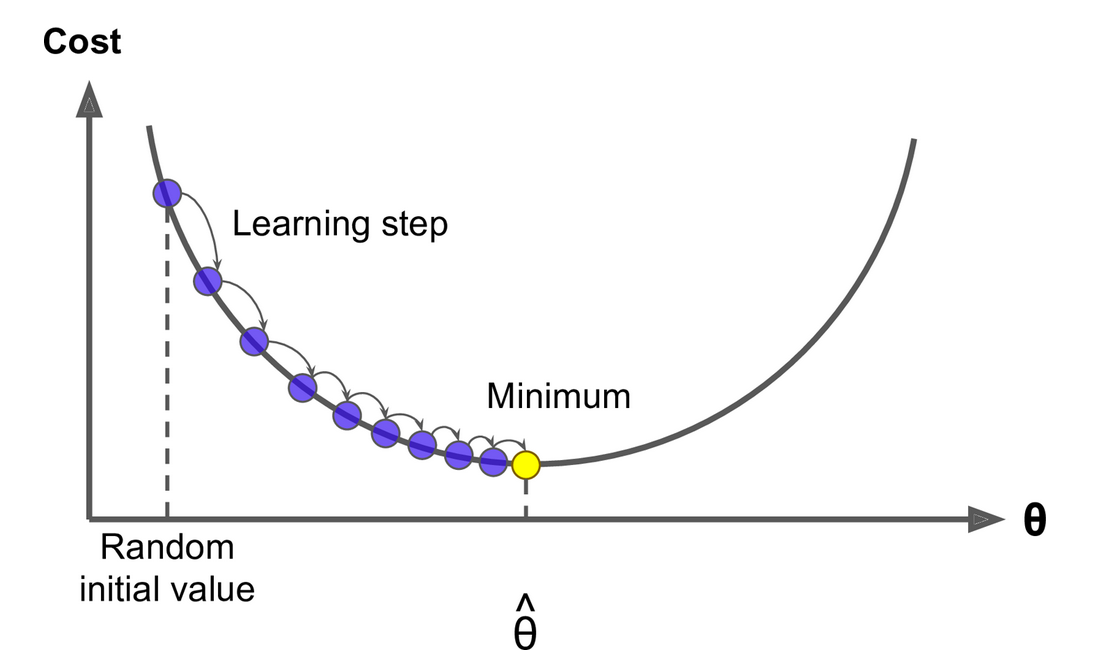

_Hyperparameter_: step size
- If step size is too big, may jump across local minimum and algorithm will diverge
- If step size is too small, too many iterations for your computing power

May hit a _local minimum_ or a _plateau_:

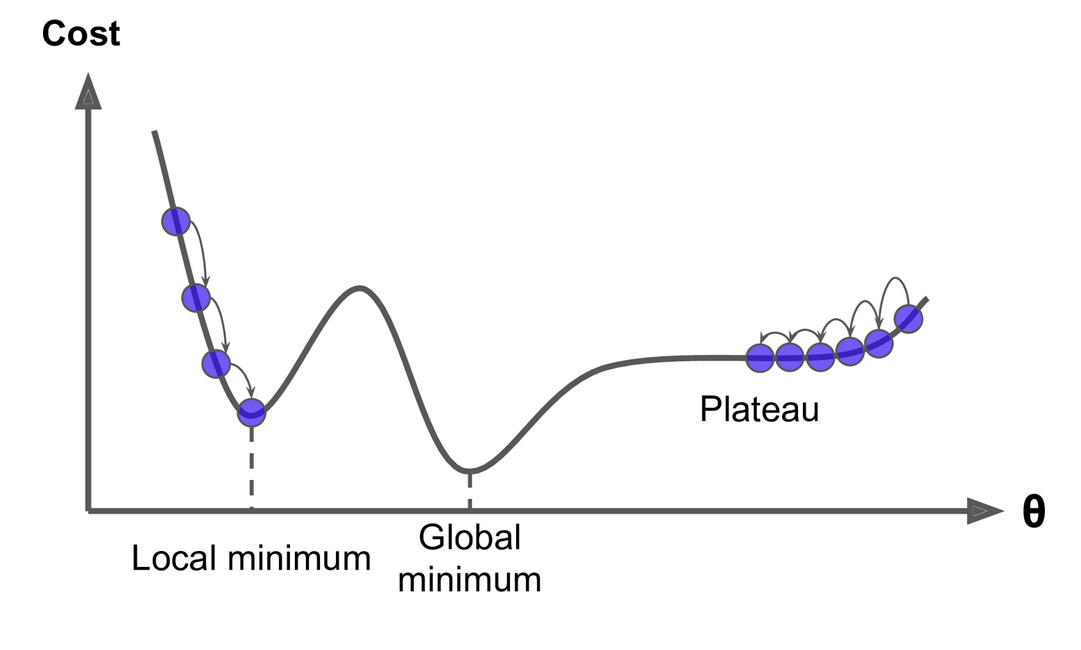

For linear regression, there's no local minima (just one global one) and there's no abrupt changes.

**WARNING**: When using gradient descent, the features should have the same scale (Scikit-Learn's _StandardScaler_ class).

#### 4.1.4.1 Batch Gradient Descent

##### 4.1.4.1.1 Defining the Gradient Vector

**GOAL:** Find gradient of cost function with respect to each model parameter $\theta_{j}$. Use the _partial derivative_. 

Given our mean square error function...

$$MSE(\textbf{X}, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\boldsymbol{\theta}^{T}\textbf{x}^{(i)} - y^{(i)})^2 = $$

Power rule the theta vector and use the chain rule...

$$\frac{\partial}{\partial \theta_j} MSE(\boldsymbol{\theta}) = \frac{2}{m} \sum^{m}_{i=1}\left(\boldsymbol{\theta}^{T}\textbf{x}^{(i)} - y^{(i)}\right) x_{j}^{(i)}$$

**GRADIENT VECTOR OF THE COST FUNCTION (MSE)**:

$$\boxed{\nabla_{\theta}MSE(\boldsymbol{\theta}) = \begin{pmatrix} \frac{\partial}{\partial \theta_0} MSE(\boldsymbol{\theta}) \\ \frac{\partial}{\partial \theta_1} MSE(\boldsymbol{\theta}) \\ \vdots \\ \frac{\partial}{\partial \theta_n} MSE(\boldsymbol{\theta})  \end{pmatrix} = \frac{2}{m}\textbf{X}^{T}\left(\textbf{X}\boldsymbol{\theta} - \textbf{y}\right)}$$

Think about what this equation is saying. The training set multiplied by the prediction vector ($\textbf{X}\boldsymbol{\theta}$) is the model's current prediciton. Subtract from that the actual value we want and we get the difference in "height" given the current value of the feature vector. The training set transposed multiplied into that difference means we are multiplying that feature (now a row) given all instances (now a column) by the difference in "height" for all instances (what was inside the parentheses). Once scaled appropriately, it gives the **gradient vector of the cost function**.

**WARNING**: This calculates over the full training set (the entire _batch_). Uses entire training set at every step. This is bad for large numbers of instances. Scales well with the number of features (much faster than Normal Equation or SVD for large number of features).

##### 4.1.4.1.2 Using the Gradient Vector

We want to move opposite of the gradient vector:

$$\boldsymbol{\theta^{'}} = \boldsymbol{\theta} - \eta\nabla_{\theta}$$

- $\eta$: Step size

Implementing this:

In [6]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1) #Random initialization

def batch_grad_descent(eta, n_iterations, theta):
    for iteration in range(n_iterations):
        gradients = 2/m * X_with_xo.T.dot(X_with_xo.dot(theta) - y)
        theta = theta - (eta * gradients)
    return theta

print("Theta vector with Batch Grad Descent: ", batch_grad_descent(eta, n_iterations, theta))

Theta vector with Batch Grad Descent:  [[4.30701865]
 [2.83187513]]


Pretty good! Let's show what happens when you play around with the step size:

In [7]:
def plt_steps_batch_grad_descent(eta, n_iterations):  
    X_lims = np.linspace(0, 2, num=100)
    X_lims_with_xo = np.c_[np.ones((100,1)), X_lims]
    
    theta = np.random.rand(2,1) #Random initialization
    m = 100
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_with_xo.T.dot(X_with_xo.dot(theta) - y)
        theta = theta - (eta * gradients)
        y_pred = X_lims_with_xo.dot(theta)
        plt.plot(X_lims, y_pred)
    
    plt.scatter(X, y)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Batch Gradient Descent \n Scaling Step Size and Iterations')
    plt.xlim(0, 2)
    plt.ylim(0,10)
    plt.legend(np.linspace(1, n_iterations, num=n_iterations))
    plt.show()
    
    print("Batch Gradient Descent Final Pred.: ", theta)
    
interactive_plt_steps_batch_grad_descent = interactive(plt_steps_batch_grad_descent, 
                                            eta=(0.001, 0.501), n_iterations=(0,7))
interactive_plt_steps_batch_grad_descent  

interactive(children=(FloatSlider(value=0.251, description='eta', max=0.501, min=0.001), IntSlider(value=3, de…

Finding a good learning rate, use _GridSearch_, but limit the number of iterations or it will take too long. 

#### 4.1.4.2 Stochiastic Gradient Descent

**Stochiastic Gradient Descent**: Picks random instance in training set at every step. Computes gradient with just that instance.

Pros:
- Much faster
- Can train on huge daining sets
- Can jump out of local mins

Cons:
- Less regular (lots of bounces)
- Does not settle on optimal final value

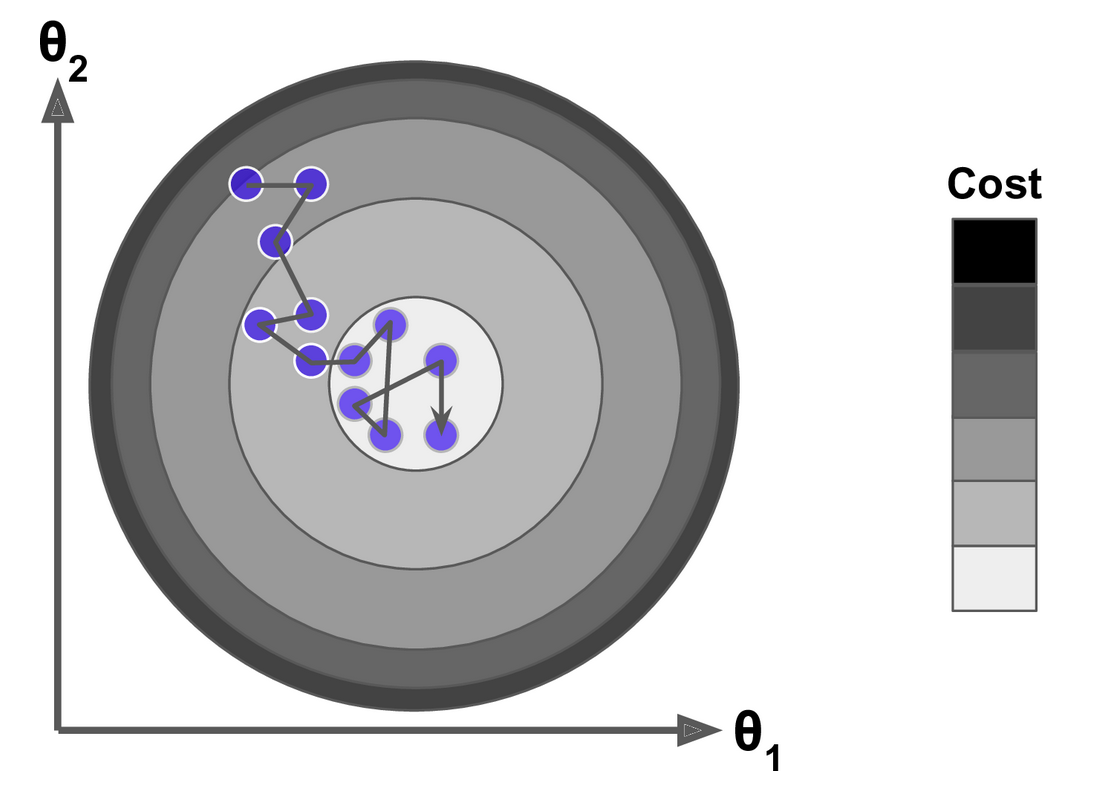

Can dynamically, gradually reduce the learning rate to settle at global min (also called _simulated annealing_).

Let's implement it with a simple _learning schedule_ (or the rate at which we reduce our step size):

In [8]:

def plt_steps_stoch_grad_descent(n_epochs, t0, t1):  
    X_lims = np.linspace(0, 2, num=100)
    X_lims_with_xo = np.c_[np.ones((100,1)), X_lims]
    
    theta = np.random.rand(2,1) #Random initialization
    m = 100
    
    def learning_schedule(t):
        return t0 / (t + t1)
    
    for epoch in range(n_epochs):
        for i in range(m):
            #Perform stoch grad descent
            random_index = np.random.randint(m)
            xi = X_with_xo[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
        #Plot predictions of the various epochs
        y_pred = X_lims_with_xo.dot(theta)
        plt.plot(X_lims, y_pred)
            
    
    plt.scatter(X, y)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Batch Gradient Descent \n Scaling Step Size and Iterations')
    plt.xlim(0, 2)
    plt.ylim(0,10)
    plt.legend(np.linspace(1, n_epochs, num=n_epochs))
    plt.show()
    
    print("Stochiastic Gradient Descent Final Pred.: ", theta)
    
interactive_plt_steps_stoch_grad_descent = interactive(plt_steps_stoch_grad_descent, 
                                            t0=(1,5), t1=(10,50), n_epochs=(1,20))
interactive_plt_steps_stoch_grad_descent  

interactive(children=(IntSlider(value=10, description='n_epochs', max=20, min=1), IntSlider(value=3, descripti…

Can be done using Scikit-Learn using _SGDRegressor_ class.
- Default to squared error cost function
- Default learning schedule is different than above

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print("Intercept for SGD: ", sgd_reg.intercept_)
print("Coef for SGD: ", sgd_reg.coef_)

Intercept for SGD:  [4.31423225]
Coef for SGD:  [2.84094706]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


#### 4.1.4.3 Mini-batch Gradient Descent

A little bit of a combo of the previous two. Computes gradient on a random subset of the instances (mini-batch).

- Performance boost from hardware optimized matrix operations (GPU processing)
- Parameter space less erratic than SGD when using larger mini-batches
- Harder to escape local minima, walks closer to said minima

RECALL:
- $m \equiv$ # of training instances
- $n \equiv$ # of features

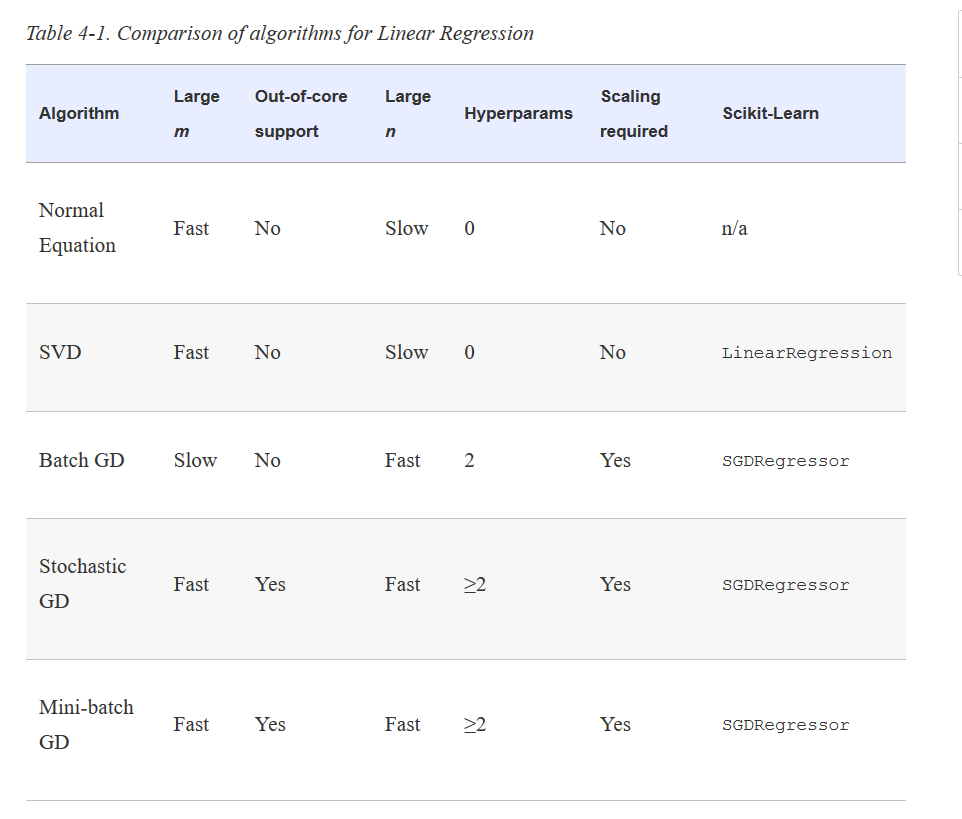

***

## 4.2 - Polynomial Regression


Can use linear models to fit nonlinear data. Add powers of each feature as new features and train the linear model on the extended features.

We can try Scikit-Learn's _PolynomialFeatures_ to transform the training data by adding the 2nd degree polynomial of each feature:

In [19]:
from sklearn.preprocessing import PolynomialFeatures

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()

print("Original Data, first instance: ", X[0])
print("Poly Transform, first instance: ", X_poly[0])

def get_rand_quad_dist(alpha, beta, gamma):
    return alpha * X**2 + beta * X + gamma + np.random.randn(m, 1)

def plt_rand_lin_dist(alpha, beta, gamma):
    y = get_rand_quad_dist(alpha, beta, gamma)
    
    X_lims = np.linspace(-3, 3, num=100)
    
    lin_reg.fit(X_poly, y)
    
    [[alpha_pred, beta_pred]] = lin_reg.coef_
    gamma_pred = lin_reg.intercept_
    
    y_pred = (alpha_pred * X_lims**2) + (beta_pred*X_lims) + gamma_pred
    
    plt.scatter(X, y)
    plt.plot(X_lims, y_pred, 'r-')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Random Quadratic Distribution \n with Scikit Learn PolynomialFeatures and \n Linear Regression')
    plt.xlim(-3, 3)
    plt.ylim(-5, 15)
    plt.show()
    

    print("Intercept: ", lin_reg.intercept_)
    print("Coefficient: ", lin_reg.coef_)
    
interactive_plt_rand_quad_dist = interactive(plt_rand_lin_dist, 
                                            alpha=(0,3), 
                                            beta=(0,3),
                                            gamma=(-2,5))
interactive_plt_rand_quad_dist

Original Data, first instance:  [-0.94015784]
Poly Transform, first instance:  [-0.94015784  0.88389676]


interactive(children=(IntSlider(value=1, description='alpha', max=3), IntSlider(value=1, description='beta', m…

Polynomial Regression can find relations b/w features because _PolynomialFeatures_ adds all combinations of features! Given two features and $degree=3$ would add the features:
- $a$
- $a^2$
- $a^3$
- $b$
- $b^2$
- $b^3$
- $ab$
- $ab^{2}$
- $a^{2}b$

Clearly, this can lead to a combinatorial explosion of features (new features $n^{'}$ with degree $d$ and number of features $n$):

$$n^{'} = \frac{(n+d)}{d!n!}$$

### 4.2.1 Learning Curves

High degree polynomial models will get as close to training data as possible. A 300-degree polynomial to the above example will extremely overfit the data. A linear model is underfitting it. 

You won't know the underlying model/pattern, so you won't know what degree will be best to use. How do we know if we are underfitting or overfitting?

- **Overfitting**: model performs well on training data, but does not generalize on cross-validation metrics
- **Underfitting**: performs bad on both

Can also look at _learning curves_ that plot model's performance on training and validation sets. 

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.ylim((0, 3))
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

Code above loops through training the model with more and more training data and calculates the errors. It stores those errors in an array and then plots the errors.

#### 4.2.1.1 Learning Curve for Linear Regression

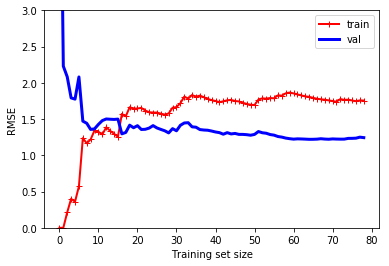

In [38]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Some notes on the above graph:
- With not many points, model will be perfect for the training set and terrible for any real-world validation
 - High validation error
 - Low training error
- More instances, the better it will do in validation
- Eventually, more instances won't help train the model and both will plateau

**IF A MODEL IS UNDERFITTING, MORE INSTANCES WILL NOT HELP. ONLY A MORE COMPLEX MODEL WILL HELP.**

#### 4.2.1.2 Learning Curve for 10th Degree Polynomial

Here, we will use that pipeline feature we learned about in Ch. 2 to expand the features out to the 10th degree and then use the linear regression model on it.

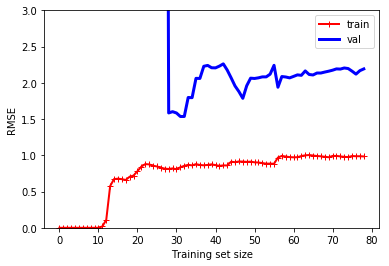

In [39]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

**To improve overfitting, feed it more data until validation error hits the training error**

- Error on training data much lower than linear regression
- Much larger gap in the curves is a hallmark of an overfit model

***
***

**The Bias/Variance Tradeoff**

Generalization error is the sum of 3 errors

**BIAS**:
- Wrong assumptions (assuming linear data when it's quadratic). 
- High biased model is likely to underfit.

**VARIANCE**:
- Sensitvity to variations in the training data
- Many degrees of freedom will have high variance, makes it more likely to overfit

**IRREDUCIBLE ERROR**:
- Noise in the data
- Only way to fix it is cleaning data
 - Fix data source (broken sensors)
 - Remove outliers
 - Smoothing
 

Increasing complexity...
- Increases variance
- Reduces bias

Reducing complexity...
- Reduces variance
- Increases bias

This is the tradeoff.

***
***



## 4.3 - Regularized Linear Models

To reduce overfitting, we can constrain the model (reduce the degrees of freedom). 

Regularizing a polynomial model is to limit degree. 

For linear models, typically constrain the weights of the model.

### 4.3.1 Ridge Regression (Tikhonov Regularization)

Regularization term $\alpha \sum^{n}_{i=1} \theta_{i}^{2}$ added to cost function. Forces the learning algorithm to keep the model weights as small as possible. This should only be added during training.

**Cost function for training may be different than the performance measure for testing**. Good training cost functions should have optimization-friendly derivatives. Could be evaluated eventually with precision/recall.

**Hyperparameter** $(\alpha)$: Weight of regularization. 

$$\boxed{J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta}) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_{i}^{2}}$$

The bias term $\theta_{0}$ is not regularized. 

Define **w** as vector of feature weights ($\theta_{1}$ to $\theta_{n}$). 

Essentially, Ridge Regression uses the L2 norm of the weight vector.

For Grad Descent, add $\alpha\textbf{w}$ to the MSE gradient vector.

**SCALE THE DATA** (can use the _StandardScaler_) **BEFORE RIDGE REGRESSION**.

Can perform Ridge Regression with a closed-form equation or with Gradient Descent. Pros and cons are the same as above. 


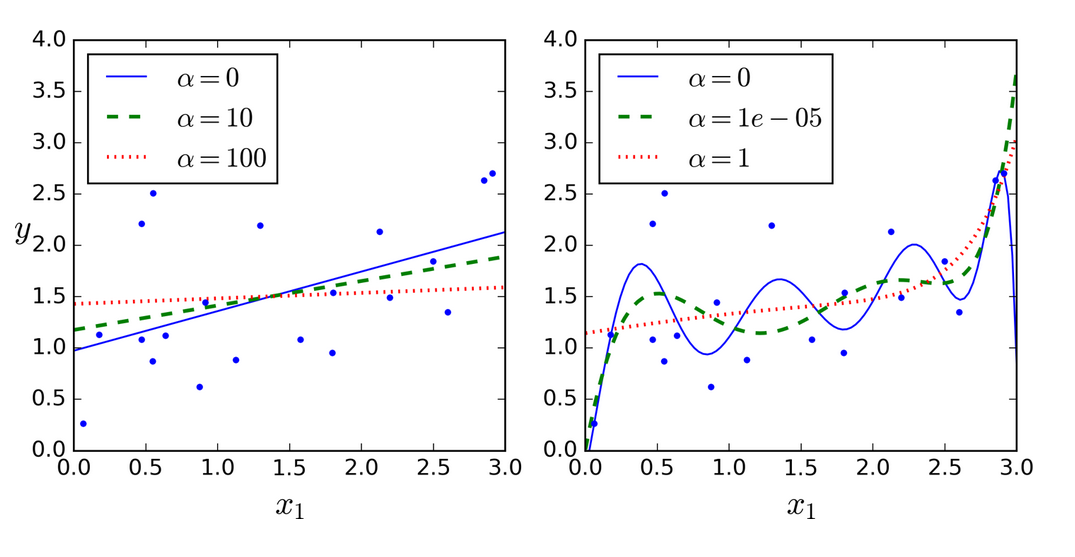

**Closed form Ridge Regression**: 

$$\boldsymbol{\hat{\theta}} = (\textbf{X}^{T}\textbf{X} + \alpha\textbf{A})^{-1}\textbf{X}^{T}\textbf{y}$$ 

where $\textbf{A}$ is the identity matrix (diagonal of ones, the rest is zeros).

How to do it with Scikit-learn:

In [44]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[5.00391086]])

In [46]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.27034448])

### 4.3.2 Lasso Regression

**Least Absolute Shrinkage and Selection Operator Regression** also adds regularization term to the cost function. Uses L1 v. the L2 norm instead.

$$\boxed{J(\boldsymbol{\theta} = MSE(\boldsymbol{\theta}) + \alpha\sum_{i=1}^{n}|\theta_{i}|}$$

- Tends to set weights of least important features to zero
- Outputs a _sparce_ model
- Essentially, performs feature selection.

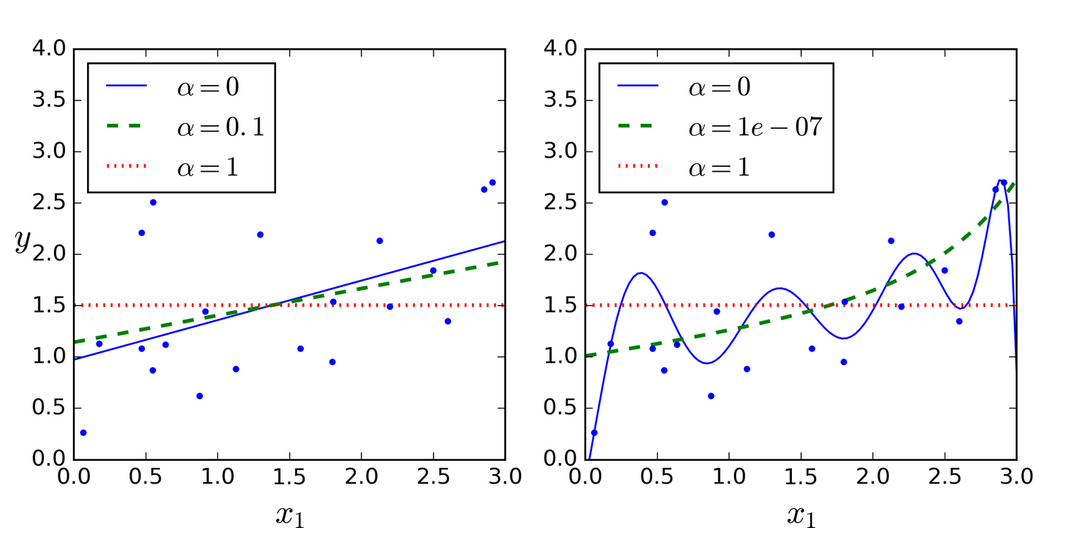


Lasso cost function can't be differentiated (absolute value term), but Grad Descent works given a _subgradient vector_ **g** when any $\theta_i = 0$:


$$ g(\boldsymbol{\theta}, J) = \nabla_{\theta} MSE(\boldsymbol{\theta}) + \alpha \begin{pmatrix} \text{sign $(\theta_1)$} \\ \text{sign $(\theta_2)$} \\ \vdots \\ \text{sign $(\theta_n)$} \end{pmatrix}  $$

$$ \text{sign $(\theta_i)$} = 
    \begin{cases} 
        -1 & \text{if $\theta_i < 0$} \\
        0 & \text{if $\theta_i = 0$} \\
        +1 & \text{if $\theta_i > 0$}
    \end{cases} 
$$

An example using Scikit-Learn:

In [1]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

NameError: name 'X' is not defined

### 4.3.3 Ridge Regression

Middle ground between Ridge and Lasso regression:

$$ J(\boldsymbol{\theta} = MSE(\boldsymbol{\theta}) + r\alpha \sum_{i=1}^{n}(|\theta_{i}|) + \frac{1 - r}{2}\alpha \sum_{i=1}^{n} (\theta^2)  $$

Use $r$ as a hyperparameter known as the _mix ratio_ between the two regularization (or constraint) terms.

Can be implemented with SkLearn _ElasticNet_. Same deal as Lasso Regression above.

### 4.3.4 When to Use Constraints on Regression

- Ridge is good for all cases
- Lasso and Elastic are good for when a few features are suspected to be dominant

### 4.3.5 Early Stopping

Stop training when the validation error reaches a minimum.

Essentially, when our validation error hits a minimum, if we keep training, the error on the training set may continue to decrease, but the model will begin to overfit to the training data and it won't generalize well to new data.

To make sure that we are at a true minimum, we can set it to stop after validation goes above a set minimum value for a specific amount of time and then roll it back to the absolute minimum found.

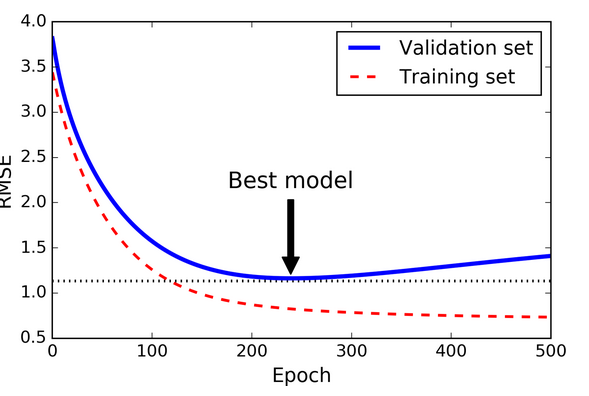

We can implement early stopping below:


In [ ]:
from sklearn.base import clone

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Prep the data
poly_scaler = Piperline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly.scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.tranform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=np.infty, warm_start=True,
                      penalty=None, learning_rate="constant",eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

It is the "warm_start=True" command that allows the fit() method to continue training from where it left off. 

### 4.3.6 Logistic Regression

Regression can be used for classification. 

**Logistic Regression**: Process of classification via regression. It estimates probability an instance belongs to a certain class (i.e. what probability is this instance a "7"?). If it is greater than 50%, model predicts an instance belongs to said class (positive class, or "1"). Becomes a binary classifier.

#### 4.3.6.1 Logistic Regression - Estimating Probabilities

- Compute weighted sum of input features plus the bias term
- Output logistic result between 0 and 1 as seen below using the _sigmoid function_...

$$ \boxed{\hat{p} = h_{\theta}(\textbf{x} = \sigma(\boldsymbol{\theta}^{T}\textbf{x})} $$

$$ \boxed{\sigma(t) = \frac{1}{1 + e^{-t}}} $$

We can plot this sigmoid function:

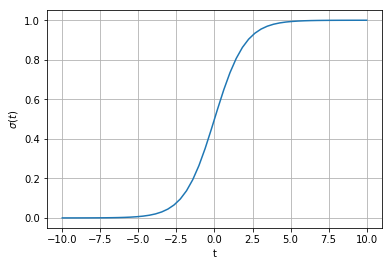

In [8]:
t = np.linspace(-10, 10)
sigmoid = 1 / (1 + np.exp(-1*t))

plt.plot(t, sigmoid)
plt.xlabel('t')
plt.ylabel('$\sigma(t)$')
plt.grid()
plt.show()

\Classification becomes:

$$ \hat{y} = 
    \begin{cases} 
        0 & \text{if $\hat{p} < 0.5$} \\
        1 & \text{if $\hat{p} >= 0.5$}
    \end{cases}
$$

#### 4.3.6.2 Logistic Regression - Training and Cost Function

How to train Logistic Regression?

Set parameter vector $\boldsymbol{\theta}$ such that model gives...
- high probabilities for instances where $y=1$
- low probabilities for instances where $y=0$

Cost function for single training instance $\textbf{x}$:

$$ c(\boldsymbol{\theta}) = 
    \begin{cases} 
        -\log{\hat{p}} & \text{if $y =1$} \\
        -\log{(1 - \hat{p})} & \text{if $y =0$}
    \end{cases}
$$

Edge cases for the cost function [$c(\boldsymbol{\theta})$]:
- $c(\boldsymbol{\theta})$ grows as $p \rightarrow 0$
- $c(\boldsymbol{\theta})$ shrinks as $p \rightarrow 1$

Cost function over entire training set is average cost over all training instances and is called the **LOG LOSS**:

$$ \boxed{J(\boldsymbol{\theta}) = -\frac{1}{m} \sum_{i=1}^{m}\left[ y^{(i)}\log{(\hat{p}^{(i)})} + (1 - y^{(i)}) \log{(1 - \hat{p}^{(i)})} \right]} $$

- No closed form equation (equivalent of normal equation)
- Cost function is convex though (GRADIENT DESCENT or other optimation algorithms can find global min)

If we take the derivative with respect to the individual elements of the parameter vector that will minimize the loss function, it will look something like this:

$$ \frac{\partial}{\partial \theta_{j}}J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m}\left[ \left( \sigma(\boldsymbol{\theta}^{T}\textbf{x}^{(i)} - y^{(i)} \right) x_{j}^{(i)} \right]$$

#### 4.3.6.2 Logistic Regression - Decision Boundaries

Use this on the _iris_ dataset that has picture and data of three different iris species...
- Image
- Sepal length
- Petal length

We wanna build a classifier from logistic regression.

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
print("Keys of Iris Dataset: ", list(iris.keys()))

Keys of Iris Dataset:  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


Now, we will build a classifier only on petal width.

In [10]:
X = iris["data"][:, 3:] # Petal Width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, 0 else

Now, we want to train that logistic regression classifier.

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Estimated probabilities for flowers with pedal widths from 0 to 3 cm:

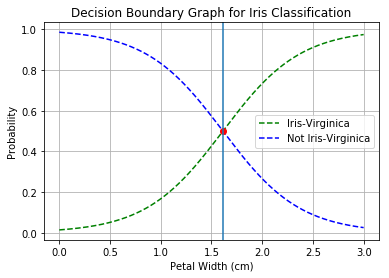

In [22]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # Reshape with 1 column and unknown rows (-1 parameter)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g--", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

#Find point where curves cross
idx = np.argwhere(np.diff(np.sign(y_proba[:, 1] - y_proba[:, 0]))).flatten()
plt.plot(X_new[idx], y_proba[idx, 1], 'ro')
plt.axvline(X_new[idx])

plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")
plt.title("Decision Boundary Graph for Iris Classification")
plt.legend()
plt.grid(True)

Interpreting the decision boundary:
- Left of the decision boundary is NOT Iris-Virginica
- Right of the decision boundary is an Iris-Virginica

Generally...
- Iris-virginica petal width ranges from 1.4 cm to 2.5 cm
- Other Iris petal width ranges from 0.1 cm to 1.8 cm
- Overlap is where classifier is not confident

**NOTE THE DIFFERENCE BETWEEN THE PREDICT METHODS**:
- _predict()_: returns whichever class is most likely (it classifies it)
- _predict_proba()_: returns probability of the classification
- Check out the example below

In [23]:
print("Example of the decision boundary (1.7, 1.5): ", log_reg.predict([[1.7], [1.5]]))

Example of the decision boundary (1.7, 1.5):  [1 0]


Logistic regression can take in more than just one feature. 

Logistic regression can be regularized w/ either penalties...
- l1
- l2 (default)

**NOTE THE HYPERPARAMETER FOR LOGISTIC REGRESSION IS...*
- $C$
- Inverse of _alpha_
- Higher $C$, the _less_ the model becomes regularized


#### 4.3.6.3 Logistic Regression - Softmax Regression

##### 4.3.6.3.1 Softmax Definitions

**Softmax Regression**: Generalize for multiple classifications directly (don't have to train multiple binary classifiers)

Given an instance $/textbf{x}$ softmax regression model ...
- computes score ($s_{k}(\textbf{x})$) for each class _k_ 
- estimates probability of each class with _softmax function_ or _normalized exponential_ with $s_{k}(\textbf{x})$ as input
- $s_{k}(\textbf{x})$ looks like linear regression prediction equation

$$s_{k}(\textbf{x}) = \left( \boldsymbol{\theta}^{(k)} \right)^{T} \textbf{x}$$

Each class has a parameter vector $\left( \boldsymbol{\theta}^{(k)} \right)^{T}$... this is indicated by the parentheses around the k... (k). Since each class has a parameter vector, these are all stored as rows in a **parameter matrix**... $\boldsymbol{\Theta}

Each class (category we are trying to predict) gets a score for each instance $\textbf{x}$. 

Probability that instance belongs to class _k_ is $\hat{p}_k$. Get it by running scores thru softmax function (computes exponential of each score and normalizes them by dividing by the sum of the exponentials)

$$ \hat{p}_{k} = \sigma(\textbf{s(x)})_{k} = \frac{e^{(s_{k}(\textbf{x}))}}{\sum_{j=1}^{K} \left( e^{(s_{j}(\textbf{x}))} \right)} $$

- $K$: # of classes (categories)
- $\textbf{s(x)}$: vector containing scores of each class for instance $\textbf{x}$
- $\sigma(\textbf{s(x)})_{k}$: estimated probability $\textbf{x}$ belongs to class _k_ given scores of each class for said instance

Softmax predicts class with highest estimated probability (class with highest score).

$$ \boxed{\hat{y} = \text{argmax}_{k} \sigma(\textbf{s(x)})_{k} = \text{argmax}_{k} \sigma_{k}(\textbf{x}) =  \text{argmax}_{k} \left( (\boldsymbol{\theta}^{(k)})^{T} \textbf{x} \right)} $$

- $\text{argmax}_{y}$: return value of variable that maximizes function
 - in this case, returns _k_ maximizing probability  $\sigma(\textbf{s(x)})_{k}$
 
**NOTE: Only predicts one class at a time (multiclass not multioutput).**

##### 4.3.6.3.2 Softmax Training

GOAL: Estimate high probability for target class

Do this by minimizing **CROSS ENTROPY**, which penalizes model for estimating low probability for target class. 

Cross entropy frequently used as metric for how well estimated class probabilities match target classes.

**CROSS ENTROPY WILL BE USED SEVERAL TIMES COMING UP**.

Defined as:

$$ \boxed{J(\boldsymbol{\Theta} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} \left( y_{k}^{(i)} \log{(\hat{p}_{k}^{(i)})} \right) } $$

-  $y_{k}^{(i)}$: target probability that ith instance belongs to class _k_. Generally equal to 1 or 0 if instance belongs to class or not respectively.

With just two classes, $K=2$, reduces to Logistic Regression cost function of **log loss**. 

***
***

**Cross Entropy**:
- Info theory roots
- Example:
 - Weather encoded in 3 bits ($2^{3} = 8$ bits)
 - If its mostly sunny, more efficient to code sunny in 1 bit and other options in the rest
- Cross entropy measures average bits you will send a person
 - If assumption about weather is perfect, cross entropy is equal to entropy of weather itself (i.e. its intrinsic unpredictability)
 - If assumption about weather is wrong, we add entropy (cross entropy will be greater by _Kullback-Leibier divergence_)
- Cross entropy between two pdf's with discrete distributions:
 - $H(p, q) = - \sum_{x} p(x) \log{[q(x)]}$

***
***

Gradient vector of cost function (again, use it find optimal model parameters that minimize our cost function, and it is bold because it is a vector)...

$$ \nabla_{\boldsymbol{\theta}^{(k)}} \textbf{J}(\boldsymbol{\Theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{p}_{k}^{(i)} - y_{k}^{(i)} \right) \textbf{x}^{(i)} $$

- Compute grad vector for every class
- Use grad descent (or other optimization algorithm) to find parameter matrix $\boldsymbol{\Theta}$ that minimizes cost function

**Use Softmax Regression to classify all three flowers**...
- _multi_class_ hyperparameter ("multinomal" switches to Softmax Regression). 
- Must also specify solver that supports Softmax Regression ("lbfgs" solver supports Softmax)
 - applies l2 regularization by default
 - control l2 regularization with hyperparameter C

In [26]:
X = iris["data"][:, (2, 3)] #petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

print("Predicting a flower with petal length 5cm, width 2cm: ", softmax_reg.predict([[5, 2]]))
print("Probability of above prediction: ", softmax_reg.predict_proba([[5, 2]]))

Predicting a flower with petal length 5cm, width 2cm:  [2]
Probability of above prediction:  [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


We be 94% sure its the 3rd option.

- Decision boundaries are still linear. 
- Model can predict with probability of less than 50%